# Fraud Detection

We will be looking at credit card transaction acquired over period of two year from 2019 to 2020 and get insights about the nature and pattern of frauds.

**Data Description**:

- **index** - Unique Identifier for each row
- **transdatetrans_time** - Transaction DateTime
- **cc_num** - Credit Card Number of Customer
- **merchant** - Merchant Name
- **category** - Category of Merchant
- **amt** - Amount of Transaction
- **first** - First Name of Credit Card Holder
- **last** - Last Name of Credit Card Holder
- **gender** - Gender of Credit Card Holder
- **street** - Street Address of Credit Card Holder
- **city** - City of Credit Card Holder
- **state** - State of Credit Card Holder
- **zip** - Zip of Credit Card Holder
- **lat** - Latitude Location of Credit Card Holder
- **long** - Longitude Location of Credit Card Holder
- **city_pop** - Credit Card Holder's City Population
- **job** - Job of Credit Card Holder
- **dob** - Date of Birth of Credit Card Holder
- **trans_num** - Transaction Number
- **unix_time** - UNIX Time of transaction
- **merch_lat** - Latitude Location of Merchant
- **merch_long** - Longitude Location of Merchant
- **is_fraud** - Fraud Flag


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#df = pd.read_csv('fraudTrain.csv', index_col=0) <- not working for some reason?
df = pd.read_csv('data/fraudTrain.csv').drop(columns='Unnamed: 0')
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df.shape

(1296675, 22)

In [6]:
# Check for null values
df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

---
## trans_date_trans_time - Transaction DateTime

Can pull out time of day, day of the week, month etc.

In [8]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [9]:
df['month'] = df['trans_date_trans_time'].dt.month

In [10]:
df['month'].value_counts()

5     146875
6     143811
3     143789
12    141060
4     134970
1     104727
2      97657
8      87359
7      86596
9      70652
11     70421
10     68758
Name: month, dtype: int64

In [11]:
df['weekday'] = df['trans_date_trans_time'].dt.day_name()

In [12]:
df['weekday'].value_counts()

Monday       254282
Sunday       250579
Saturday     200957
Tuesday      160227
Friday       152272
Thursday     147285
Wednesday    131073
Name: weekday, dtype: int64

In [13]:
# one hot encode 'month' column
month = pd.get_dummies(df['month'])

# join new columns and drop original
df = pd.concat((df, month), axis=1).drop(columns='month')
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,3,4,5,6,7,8,9,10,11,12
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0,0,0,0,0,0,0,0,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,0,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# one hot encode 'month' column
weekday = pd.get_dummies(df['weekday'])

# join new columns and drop original
df = pd.concat((df, weekday), axis=1).drop(columns='weekday')
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,10,11,12,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0,0,0,0,0,0,0,0,1,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,0,0,0,0,0,0,0,0,1,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0,0,0,0,0,0,0,0,1,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,0,0,0,0,0,0,0,0,1,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,0,0,0,0,0,0,0,0,1,0


In [15]:
df = df.drop(columns='trans_date_trans_time')

---
# Data cleaning by column:
---
### cc_num - Credit Card Number of Customer

Only 983 unique customers

In [16]:
df['cc_num'].value_counts()

571365235126           3123
4512828414983801773    3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
4225628813173670          7
4734310647841293          7
4714017207228610634       7
501894933032              7
3545578418030657          7
Name: cc_num, Length: 983, dtype: int64

In [17]:
df = df.drop(columns='cc_num')

---
### merchant - Merchant Name

Drop this column, probably not very generalizable anyways

In [18]:
df['merchant'].value_counts()

fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: merchant, Length: 693, dtype: int64

In [19]:
df = df.drop(columns='merchant')

---
### category - Category of Merchant

Definitely encode this column

In [20]:
df['category'].value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

In [21]:
# one hot encode 'category' column
category = pd.get_dummies(df['category'])

# join new columns and drop original
df = pd.concat((df, category), axis=1).drop(columns='category')
df.head()

,amt,first,last,gender,street,city,state,zip,lat,long,...,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,...,0,0,0,0,1,0,0,0,0,0
1,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,...,1,0,0,0,0,0,0,0,0,0
2,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,...,0,0,0,0,0,0,0,0,0,0
3,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,...,0,0,0,0,0,0,0,0,0,0
4,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,...,0,0,0,0,0,1,0,0,0,0


---
### amt - Amount of Transaction
Log transform this column

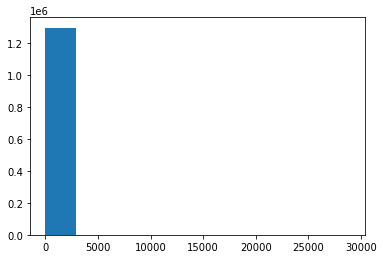

In [22]:
plt.figure()
plt.hist(df['amt'])
plt.show()

In [23]:
df['amt'] = np.log(df['amt'])

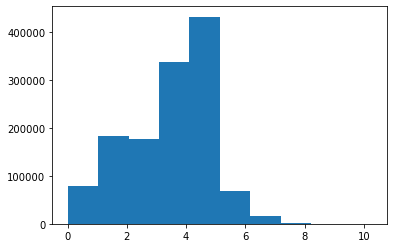

In [24]:
plt.figure()
plt.hist(df['amt'])
plt.show()

---
### first - First Name of Credit Card Holder
Drop this column

In [25]:
df = df.drop(columns='first')

---
### last - Last Name of Credit Card Holder
Drop this column

In [26]:
df = df.drop(columns='last')

---
### gender - Gender of Credit Card Holder
Encode this column

In [27]:
# one hot encode 'gender' column
gender = pd.get_dummies(df['gender']).iloc[:,0]

# join new columns and drop original
df = pd.concat((df, gender), axis=1).drop(columns='gender')
df.head()

,amt,street,city,state,zip,lat,long,city_pop,job,dob,...,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,F
0,1.603420,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,...,0,0,0,1,0,0,0,0,0,1
1,4.674976,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,...,0,0,0,0,0,0,0,0,0,1
2,5.394127,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,...,0,0,0,0,0,0,0,0,0,0
3,3.806662,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,...,0,0,0,0,0,0,0,0,0,0
4,3.736717,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,...,0,0,0,0,1,0,0,0,0,0


---
### street - Street Address of Credit Card Holder
Drop this column

In [28]:
df = df.drop(columns='street')

---
### city - City of Credit Card Holder

Encode this columm

In [29]:
df['city'].value_counts()

Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Norfolk           7
Claypool          7
Karns City        7
Vacaville         7
Bruce             7
Name: city, Length: 894, dtype: int64

In [30]:
# one hot encode 'city' column
city = pd.get_dummies(df['city'])

# join new columns and drop original
df = pd.concat((df, city), axis=1).drop(columns='city')
df.head()

,amt,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,...,Winnsboro,Winslow,Winter,Winthrop,Wittenberg,Woods Cross,Woodville,Yellowstone National Park,Zaleski,Zavalla
0,1.603420,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,...,0,0,0,0,0,0,0,0,0,0
1,4.674976,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,...,0,0,0,0,0,0,0,0,0,0
2,5.394127,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,...,0,0,0,0,0,0,0,0,0,0
3,3.806662,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,...,0,0,0,0,0,0,0,0,0,0
4,3.736717,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,...,0,0,0,0,0,0,0,0,0,0


---
### state - State of Credit Card Holder

Encode this column

In [31]:
df['state'].value_counts()

TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: state, dtype: int64

In [32]:
# one hot encode 'state' column
state = pd.get_dummies(df['state'])

# join new columns and drop original
df = pd.concat((df, state), axis=1).drop(columns='state')
df.head()

,amt,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,1.603420,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,...,0,0,0,0,0,0,0,0,0,0
1,4.674976,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,...,0,0,0,0,0,0,1,0,0,0
2,5.394127,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,...,0,0,0,0,0,0,0,0,0,0
3,3.806662,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,...,0,0,0,0,0,0,0,0,0,0
4,3.736717,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,...,0,0,0,0,1,0,0,0,0,0


---
### zip - Zip of Credit Card Holder
Drop this column

In [33]:
df = df.drop(columns='zip')

---
### lat - Latitude Location of Credit Card Holder
Leave these columns

---
### long - Longitude Location of Credit Card Holder

---
### city_pop - Credit Card Holder's City Population
Log transform this column

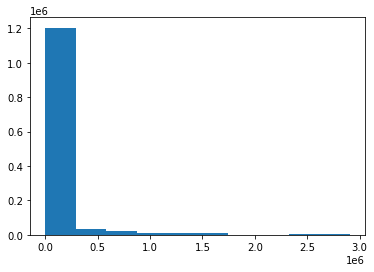

In [34]:
plt.figure()
plt.hist(df['city_pop'])
plt.show()

In [35]:
df['city_pop'] = np.log(df['city_pop'])

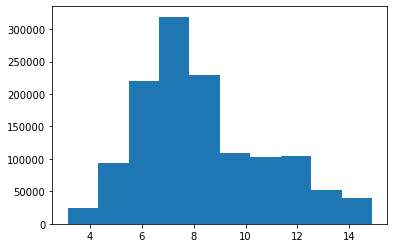

In [36]:
plt.figure()
plt.hist(df['city_pop'])
plt.show()

---
### job - Job of Credit Card Holder

Encode this column

In [37]:
df['job'].value_counts()

Film/video editor                 9779
Exhibition designer               9199
Naval architect                   8684
Surveyor, land/geomatics          8680
Materials engineer                8270
                                  ... 
Veterinary surgeon                   8
Armed forces technical officer       8
Contracting civil engineer           7
Warehouse manager                    7
Ship broker                          7
Name: job, Length: 494, dtype: int64

In [38]:
# one hot encode 'state' column
job = pd.get_dummies(df['job'])

# join new columns and drop original
df = pd.concat((df, job), axis=1).drop(columns='job')
df.head()

,amt,lat,long,city_pop,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,...,Visual merchandiser,Volunteer coordinator,Warden/ranger,Warehouse manager,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,1.603420,36.0788,-81.1781,8.159089,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,...,0,0,0,0,0,0,0,0,0,0
1,4.674976,48.8878,-118.2105,5.003946,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,...,0,0,0,0,0,0,0,0,0,0
2,5.394127,42.1808,-112.2620,8.331827,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,...,0,0,0,0,0,0,0,0,0,0
3,3.806662,46.2306,-112.1138,7.569928,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,...,0,0,0,0,0,0,0,0,0,0
4,3.736717,38.4207,-79.4629,4.595120,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,...,0,0,0,0,0,0,0,0,0,0


---
### dob - Date of Birth of Credit Card Holder

Convert to age

In [39]:
df['dob'] = pd.to_datetime(df['dob'])

In [40]:
from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [41]:
age = []
for dob in df['dob']:
    age.append(calculate_age(dob))

In [42]:
df['age'] = age
df = df.drop(columns='dob')
df.head()

,amt,lat,long,city_pop,trans_num,unix_time,merch_lat,merch_long,is_fraud,1,...,Volunteer coordinator,Warden/ranger,Warehouse manager,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer,age
0,1.603420,36.0788,-81.1781,8.159089,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,1,...,0,0,0,0,0,0,0,0,0,33
1,4.674976,48.8878,-118.2105,5.003946,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,1,...,0,0,0,0,0,0,0,0,0,42
2,5.394127,42.1808,-112.2620,8.331827,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,1,...,0,0,0,0,0,0,0,0,0,59
3,3.806662,46.2306,-112.1138,7.569928,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,1,...,0,0,0,0,0,0,0,0,0,54
4,3.736717,38.4207,-79.4629,4.595120,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,1,...,0,0,0,0,0,0,0,0,0,35


---
### trans_num - Transaction Number
Drop this column

In [43]:
df = df.drop(columns='trans_num')

---
### unix_time - UNIX Time of transaction
Drop this column

In [44]:
df = df.drop(columns='unix_time')

---
### merch_lat
Leave these columns

---
### merch_long

---
### is_fraud

We might want to do something to try and balance the classes a little more

In [45]:
df['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

---
# Modelling
---
### Train/test split


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Columns: 1481 entries, amt to age
dtypes: float64(6), int64(2), uint8(1473)
memory usage: 1.9 GB


In [47]:
# features
X = df.drop('is_fraud', axis=1)

# target
y = df['is_fraud']

In [48]:
print(X.shape)
print(y.shape)

(1296675, 1480)
(1296675,)


In [49]:
from sklearn.model_selection import train_test_split
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

In [50]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(907672, 1480)
(907672,)
(389003, 1480)
(389003,)


---
### Downsampling

In [51]:
from sklearn.utils import resample
print('Number of class 1 examples before:', X_train[y_train == 0].shape[0])
X_downsampled, y_downsampled = resample(X_train[y_train == 0], 
                                    y_train[y_train == 0], 
                                    replace=True, 
                                    n_samples=X_train[y_train == 1].shape[0], 
                                    random_state=123)
print('Number of class 1 examples after:', X_downsampled.shape[0])
# Combine downsample with original data
X_train_bal = np.vstack((X_train[y_train == 1], X_downsampled))
y_train_bal = np.hstack((y_train[y_train == 1], y_downsampled))

Number of class 1 examples before: 902418
Number of class 1 examples after: 5254


---
### Fitting a decision tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=20)
dt.fit(X_train_bal, y_train_bal)

DecisionTreeClassifier(max_depth=20)

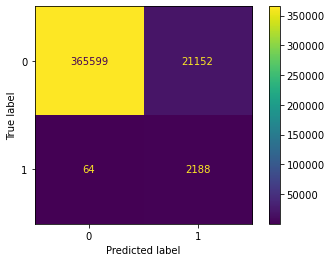

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# generate the conf matrix
conf_mat = confusion_matrix(y_test, dt.predict(X_test))

# plot
ConfusionMatrixDisplay(conf_mat).plot()
plt.show()

---
### Optimizing decision tree for recall

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

estimators = [('model', DecisionTreeClassifier())]

pipe = Pipeline(estimators)

param_grid = [{'model': [DecisionTreeClassifier()],
             'model__max_depth': list(range(1,int(np.sqrt(X_train.shape[1]))))}]

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='recall')
fittedgrid = grid.fit(X_train_bal, y_train_bal)

Fitting 5 folds for each of 37 candidates, totalling 185 fits


In [55]:
# Recall score
fittedgrid.score(X_test,y_test)

0.9755772646536413

In [56]:
# Best hyperparameters
fittedgrid.best_params_

{'model': DecisionTreeClassifier(max_depth=9), 'model__max_depth': 9}

In [57]:
dt = DecisionTreeClassifier(max_depth=9)
dt.fit(X_train_bal, y_train_bal)

DecisionTreeClassifier(max_depth=9)

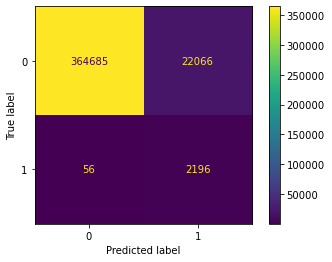

In [58]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, dt.predict(X_test))

# Plot
ConfusionMatrixDisplay(conf_mat).plot()
plt.show()

---
### Fitting a random forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train_bal, y_train_bal)

RandomForestClassifier(n_estimators=50)

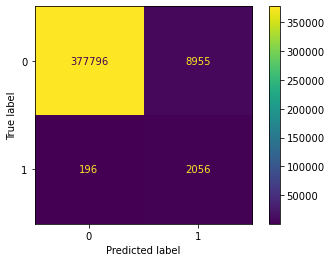

In [60]:
conf_mat = confusion_matrix(y_test, rf.predict(X_test))

# plot
ConfusionMatrixDisplay(conf_mat).plot()
plt.show()

--- 
### Optimizing random forest for recall

In [61]:
estimators = [('model', RandomForestClassifier())]

pipe = Pipeline(estimators)

param_grid = [{'model': [RandomForestClassifier()],
             'model__n_estimators': list(range(1,int(np.sqrt(X_train.shape[1]))))}]

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='recall')
fittedgrid = grid.fit(X_train_bal, y_train_bal)

Fitting 5 folds for each of 37 candidates, totalling 185 fits


In [62]:
fittedgrid.score(X_test,y_test)

0.9089698046181173

In [63]:
# Best hyperparameters
fittedgrid.best_params_

{'model': RandomForestClassifier(n_estimators=31), 'model__n_estimators': 31}

In [64]:
rf = RandomForestClassifier(n_estimators=29)
rf.fit(X_train_bal, y_train_bal)

RandomForestClassifier(n_estimators=29)

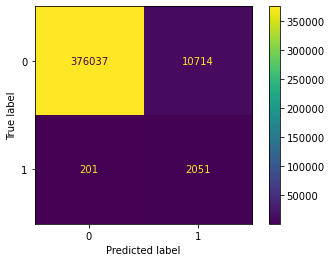

In [65]:
conf_mat = confusion_matrix(y_test, rf.predict(X_test))

# plot
ConfusionMatrixDisplay(conf_mat).plot()
plt.show()

---
### Taking a sample of X_train

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
X_train_sample, X_train_remainder, y_train_sample, y_train_remainder = train_test_split(X_train, y_train, test_size = 0.9, stratify = y_train)

In [ ]:
print(X_train_sample.shape)
print(y_train_sample.shape)
print(X_train_sample.shape)
print(y_train_sample.shape)

---
### SMOTE (Synthetic Minority Oversampling TEchnique)

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# instantiate SMOTE sampler, fit it to a sample of training data, then resample the data
X_train_smot, y_train_smot = SMOTE().fit_resample(X_train_sample, y_train_sample)

In [ ]:
# check what SMOTE has done
print('Original class distribution')
display(pd.Series(y_train).value_counts().sort_index())

print('\nResampled class distribution')
display(pd.Series(y_train_smot).value_counts().sort_index())

---
### Fitting a Decision tree on SMOTE sample

In [89]:
dt = DecisionTreeClassifier(max_depth=20)
dt.fit(X_train_smot, y_train_smot)

DecisionTreeClassifier(max_depth=20)

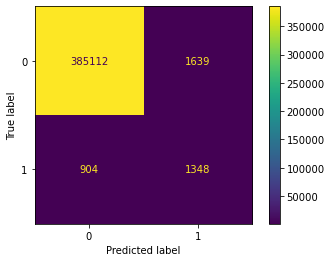

In [90]:
# generate the conf matrix
conf_mat = confusion_matrix(y_test, dt.predict(X_test))

# plot
ConfusionMatrixDisplay(conf_mat).plot()
plt.show()

---

### Fitting a Xgboost

In [66]:
from xgboost import XGBClassifier

# fit model no training data
xbt_model = XGBClassifier( random_state=1)
xbt_model.fit(X_train_bal, y_train_bal)


C:\Users\Parvinder\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:44:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Test Results


C:\Users\Parvinder\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.96      0.98    386751
           1       0.13      0.98      0.23      2252

    accuracy                           0.96    389003
   macro avg       0.57      0.97      0.61    389003
weighted avg       0.99      0.96      0.98    389003



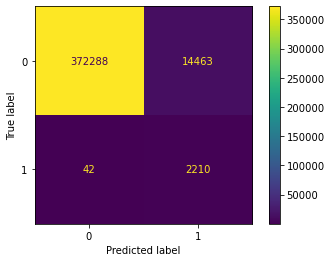

In [69]:
from sklearn.metrics import classification_report

print("Test Results")
pred_test = xbt_model.predict(X_test)

cf_xg = confusion_matrix(y_test, pred_test)

ConfusionMatrixDisplay(cf_xg).plot()

print(classification_report(y_test, pred_test))

#### Conclusion
We were able to predict more than 98% fraud with our Xgboost algorithm. Although, there is less precision but our priority is to detect every fraud possible. 

---